In [1]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('data/chart_data.csv')

In [3]:
df['EMA1'] = df['close'].ewm(span=42).mean().round(2)
df['EMA2'] = df['close'].ewm(span=252).mean().round(2)

In [4]:
df.head()

date     open    close     high      low   volume    uOpen   uClose  \
0  2018-11-23  1517.00  1502.06  1536.20  1501.81  2707642  1517.00  1502.06   
1  2018-11-26  1539.00  1581.33  1584.81  1524.22  6257716  1539.00  1581.33   
2  2018-11-27  1575.99  1581.42  1597.65  1558.01  5783227  1575.99  1581.42   
3  2018-11-28  1613.92  1677.75  1681.45  1601.21  8458738  1613.92  1677.75   
4  2018-11-29  1674.99  1673.57  1689.99  1652.33  6613243  1674.99  1673.57   

     uHigh     uLow  uVolume  change  changePercent       label  \
0  1536.20  1501.81  2707642    0.00         0.0000  Nov 23, 18   
1  1584.81  1524.22  6257716   79.27         5.2774  Nov 26, 18   
2  1597.65  1558.01  5783227    0.09         0.0057  Nov 27, 18   
3  1681.45  1601.21  8458738   96.33         6.0914  Nov 28, 18   
4  1689.99  1652.33  6613243   -4.18        -0.2491  Nov 29, 18   

   changeOverTime     EMA1     EMA2  
0        0.000000  1502.06  1502.06  
1        0.052774  1542.64  1541.85  
2        0.052834  1556.19  1555.15  
3        0.116966  1588.78  1586.16  
4        0.114183  1607.39  1603.92

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
date              252 non-null object
open              252 non-null float64
close             252 non-null float64
high              252 non-null float64
low               252 non-null float64
volume            252 non-null int64
uOpen             252 non-null float64
uClose            252 non-null float64
uHigh             252 non-null float64
uLow              252 non-null float64
uVolume           252 non-null int64
change            252 non-null float64
changePercent     252 non-null float64
label             252 non-null object
changeOverTime    252 non-null float64
EMA1              252 non-null float64
EMA2              252 non-null float64
dtypes: float64(13), int64(2), object(2)
memory usage: 33.6+ KB


In [6]:
df.describe()

open        close         high          low        volume  \
count   252.000000   252.000000   252.000000   252.000000  2.520000e+02   
mean   1768.206349  1767.940556  1783.775556  1749.923413  4.318275e+06   
std     124.881686   124.258092   119.771288   128.503504  2.011205e+06   
min    1346.000000  1343.960000  1396.030000  1307.000000  1.690294e+06   
25%    1680.750000  1676.952500  1700.127500  1664.152500  2.882471e+06   
50%    1777.500000  1776.870000  1792.350000  1761.980000  3.705046e+06   
75%    1845.175000  1847.962500  1853.232500  1834.502500  5.209566e+06   
max    2025.620000  2020.990000  2035.800000  2003.870000  1.364032e+07   

             uOpen       uClose        uHigh         uLow       uVolume  \
count   252.000000   252.000000   252.000000   252.000000  2.520000e+02   
mean   1768.206349  1767.940556  1783.775556  1749.923413  4.318275e+06   
std     124.881686   124.258092   119.771288   128.503504  2.011205e+06   
min    1346.000000  1343.960000  1396.030000  1307.000000  1.690294e+06   
25%    1680.750000  1676.952500  1700.127500  1664.152500  2.882471e+06   
50%    1777.500000  1776.870000  1792.350000  1761.980000  3.705046e+06   
75%    1845.175000  1847.962500  1853.232500  1834.502500  5.209566e+06   
max    2025.620000  2020.990000  2035.800000  2003.870000  1.364032e+07   

           change  changePercent  changeOverTime         EMA1         EMA2  
count  252.000000     252.000000      252.000000   252.000000   252.000000  
mean     0.966905       0.075997        0.177011  1754.588889  1715.582381  
std     30.178121       1.813862        0.082725   110.737828    87.190588  
min   -103.960000      -5.865600       -0.105255  1502.060000  1502.060000  
25%    -14.155000      -0.763075        0.116435  1637.067500  1623.432500  
50%      2.185000       0.127750        0.182955  1778.830000  1745.245000  
75%     16.365000       0.930925        0.230285  1842.845000  1798.345000  
max    126.940000       9.445200        0.345479  1930.130000  1812.610000

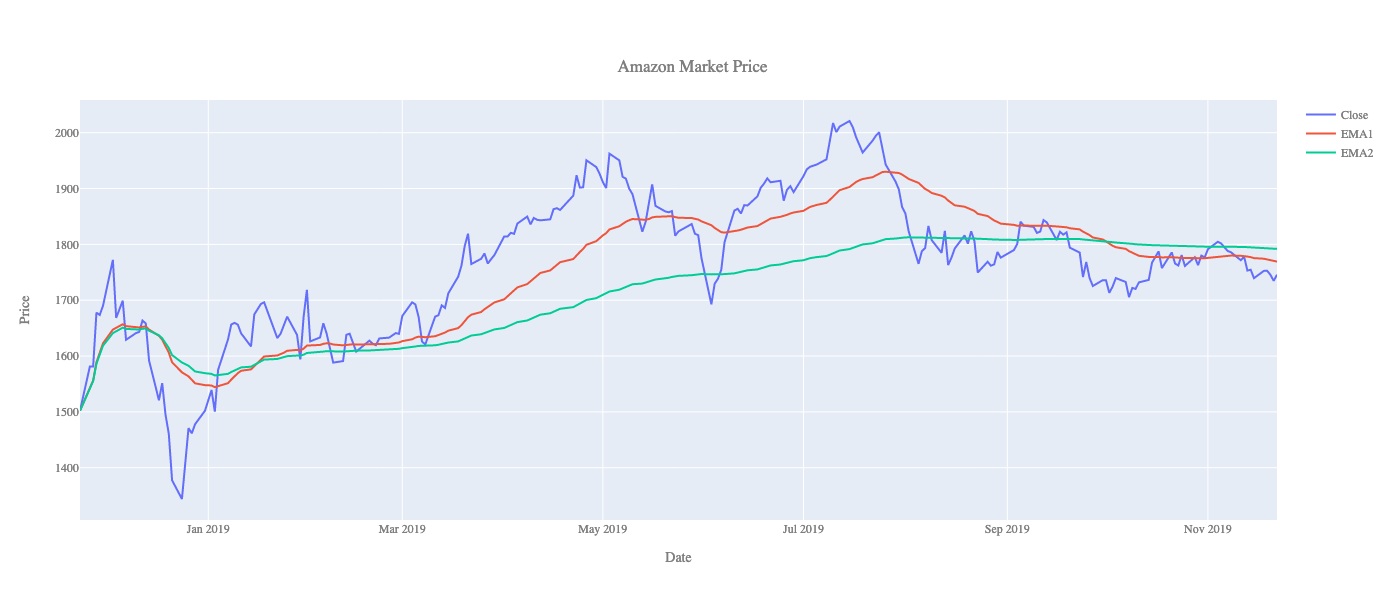

In [7]:
fig = go.Figure([go.Scatter(x=df['date'], y=df['close'], name='Close'), 
                 go.Scatter(x=df['date'], y=df['EMA1'], name='EMA1'), 
                 go.Scatter(x=df['date'], y=df['EMA2'], name='EMA2')])

fig.update_layout(
    title={'text': "Amazon Market Price", 
           'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="Oswald",
        size=12,
        color="#7f7f7f"
    ),
    width=1200,
    height=600)

fig.show()

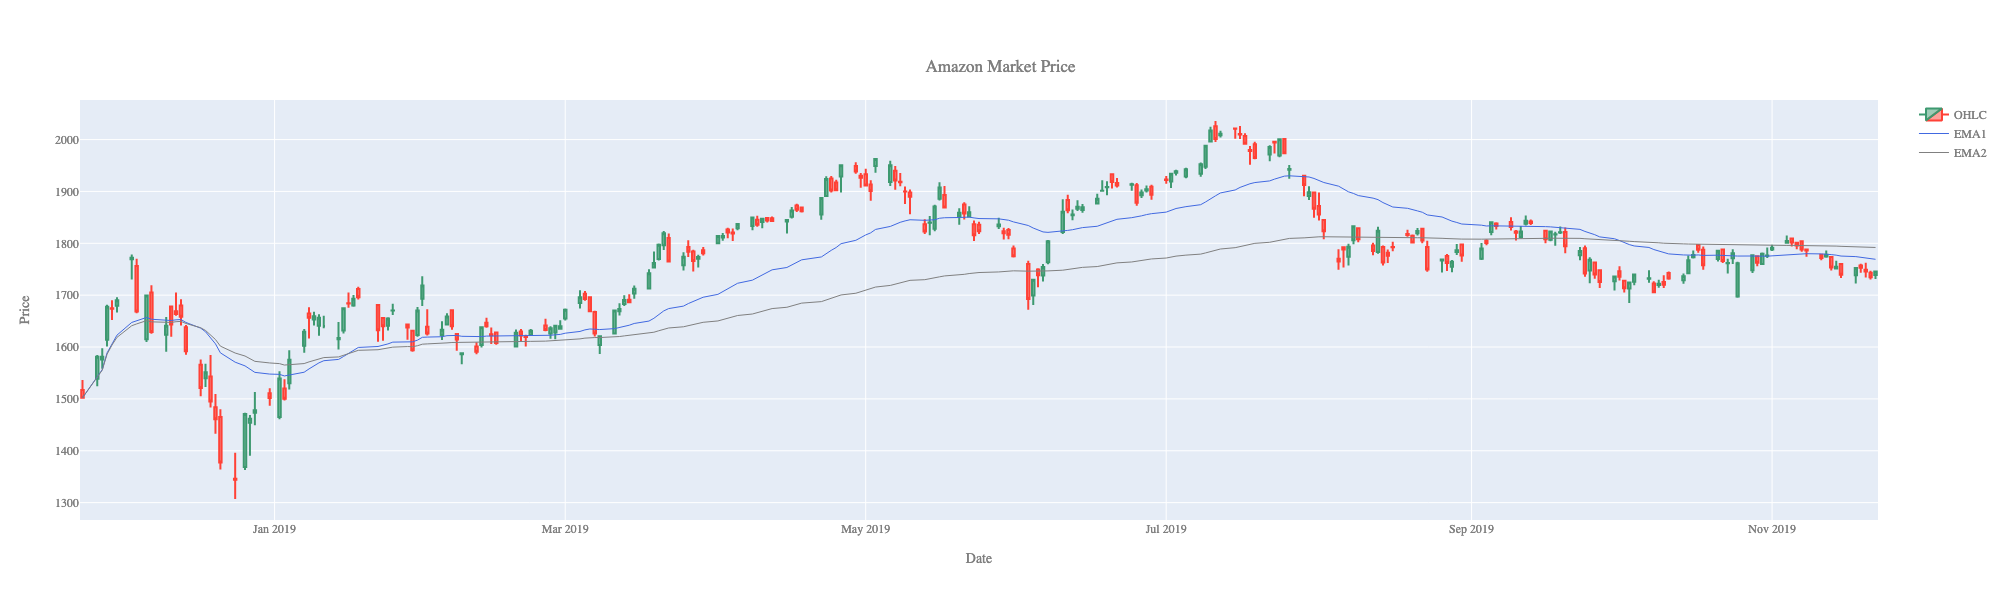

In [49]:
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'], name='OHLC')])

fig.add_trace(go.Scatter(x=df['date'], y=df['EMA1'], line=dict(color='royalblue', width=1), name='EMA1'))
fig.add_trace(go.Scatter(x=df['date'], y=df['EMA2'], line=dict(color='grey', width=1), name='EMA2'))

fig.update_layout(
    title={'text': "Amazon Market Price", 
           'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="Oswald",
        size=12,
        color="#7f7f7f"
    ),
    width=1600,
    height=600)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

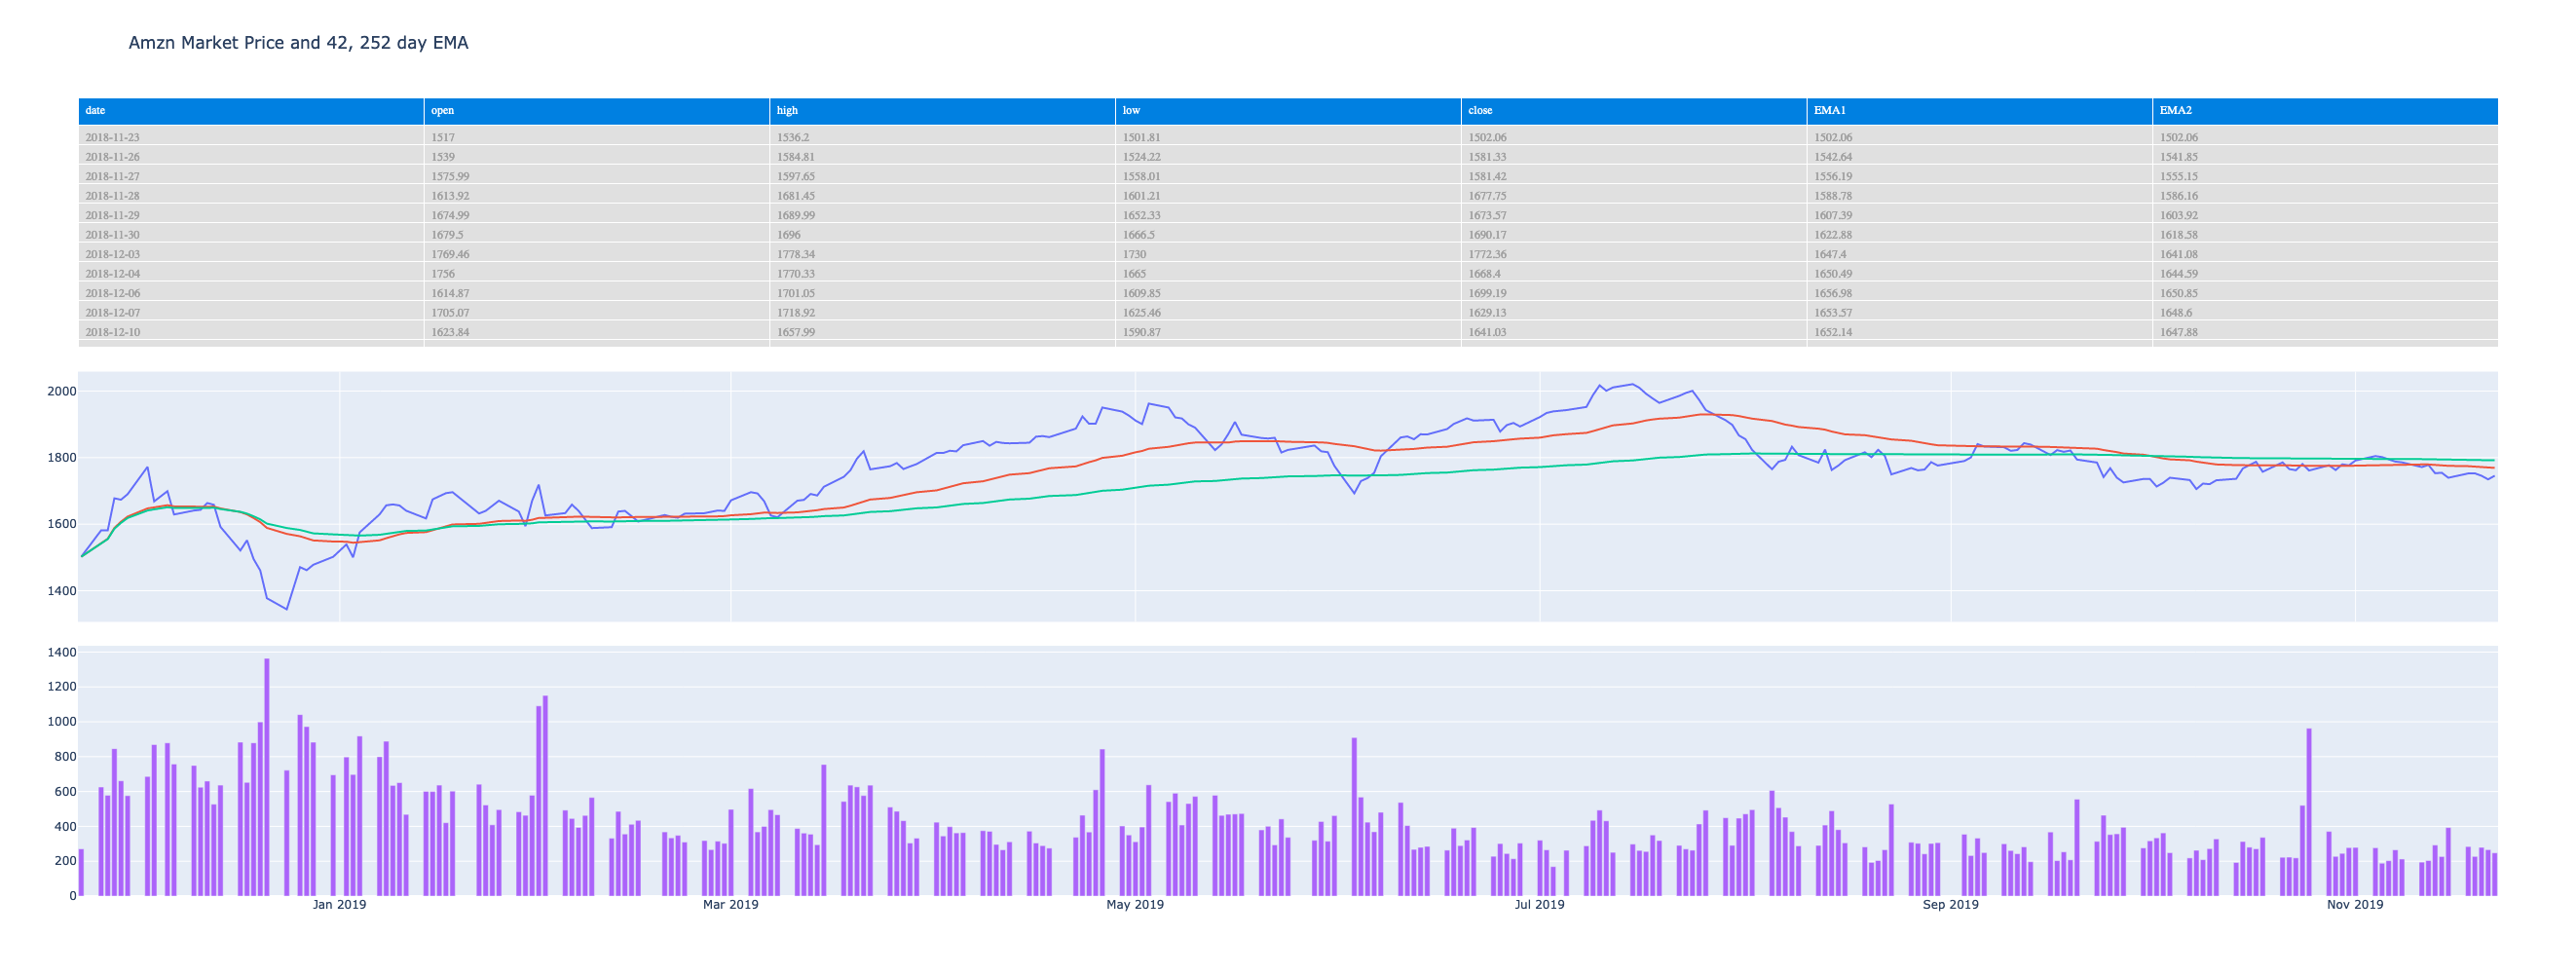

In [35]:
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

t1 = go.Scatter(x=df['date'], y=df['close'])
t2 = go.Scatter(x=df['date'], y=df['EMA1'])
t3 = go.Scatter(x=df['date'], y=df['EMA2'])

                
fig.add_trace(go.Scatter(x=df['date'], y=df['close']), row=2, col=1)
fig.append_trace(t2, row=2, col=1)
fig.append_trace(t3, row=2, col=1)

fig.add_trace(go.Bar(x=df["date"], y=df["volume"]/10000), row=3, col=1)

fig.add_trace(
    go.Table(
    header=dict(values=list(('date', 'open', 'high', 'low', 'close', 'EMA1', 'EMA2')),
                fill_color='rgb(0, 128, 225)',
                font=dict(family="Oswald",size=12,color="rgb(255,255,255)"),
                align='left'),
    cells=dict(values=[df.date, df.open, df.high, df.low, df.close, df.EMA1, df.EMA2],
               fill_color='rgb(224, 224, 224)',
               font=dict(family="Oswald",size=12,color="rgb(160,160, 160)"),
               align='left')), row=1, col=1)

fig.update_layout(
    height=1000,
    width=2000,
    showlegend=False,
    title_text="Amzn Market Price and 42, 252 day EMA",
)

fig.show()

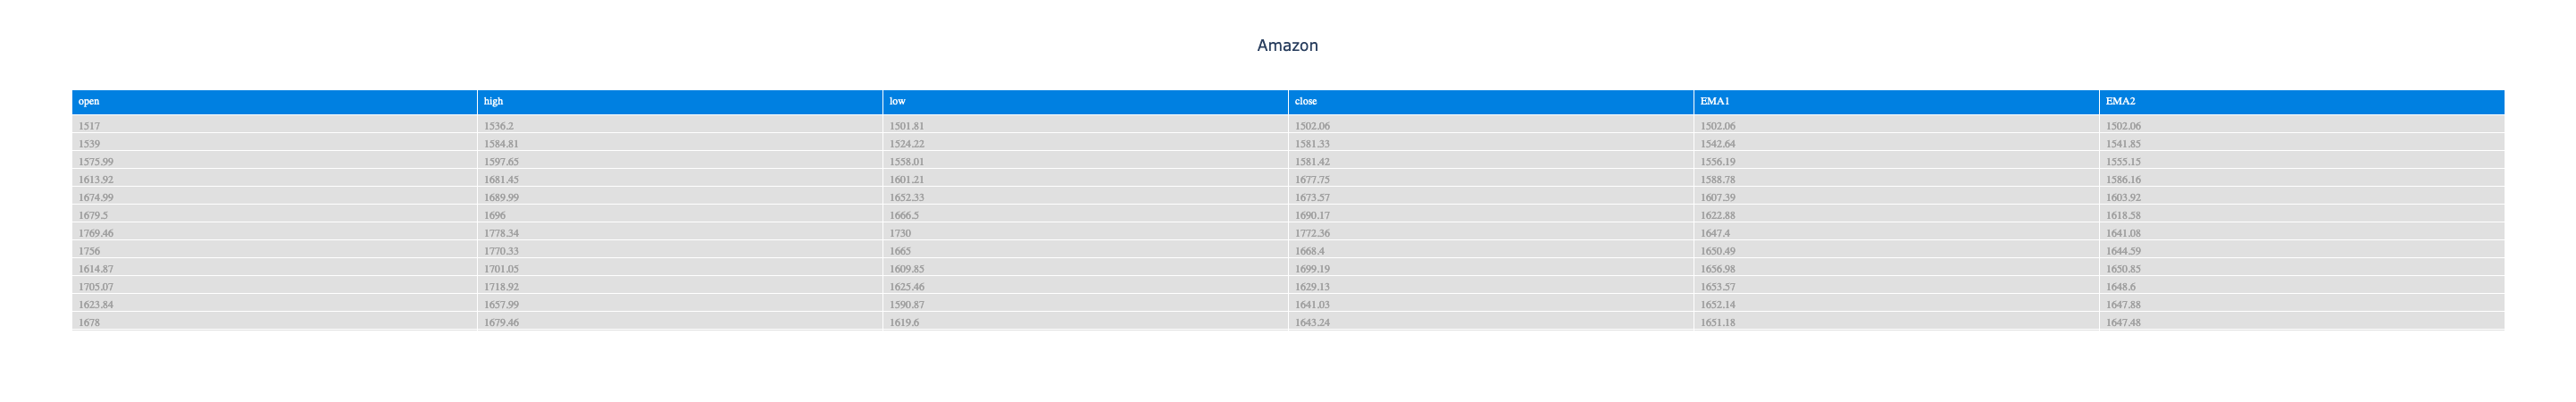

In [24]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(('open', 'high', 'low', 'close', 'EMA1', 'EMA2')),
                fill_color='rgb(0, 128, 225)',
                font=dict(family="Oswald",size=12,color="rgb(255,255,255)"),
                align='left'),
    cells=dict(values=[df.open, df.high, df.low, df.close, df.EMA1, df.EMA2],
               fill_color='rgb(224, 224, 224)',
               font=dict(family="Oswald",size=12,color="rgb(160,160, 160)"),
               align='left'))])

fig.update_layout(
    title={'text': "Amazon", 
           'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'})

fig.show()

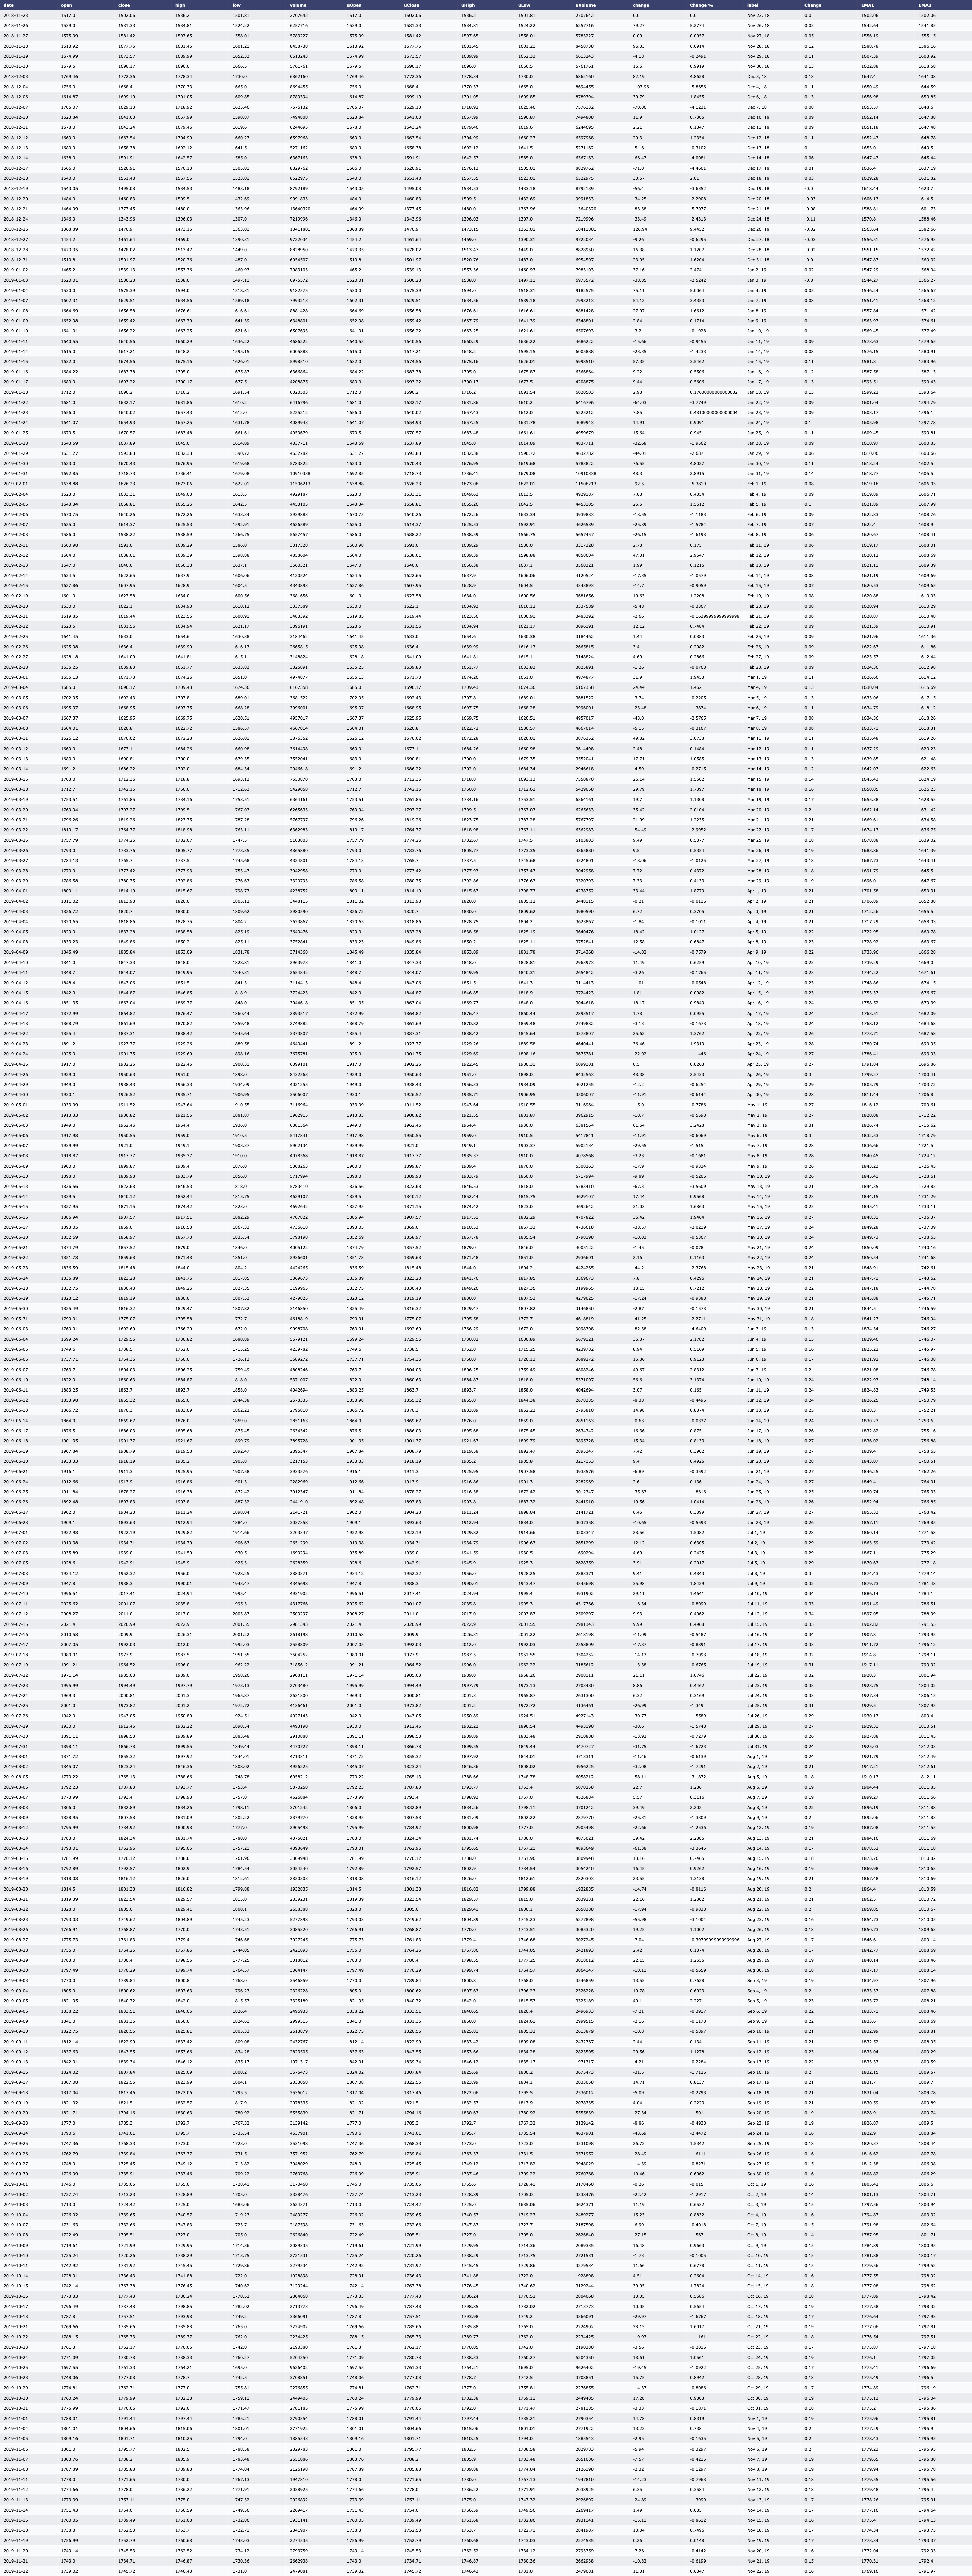

In [25]:
import plotly.figure_factory as ff
df = df.rename(columns={'changePercent': 'Change %', 'changeOverTime': 'Change'})
df.Change = df.Change.round(2)
fig = ff.create_table(df)
fig.show()